In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

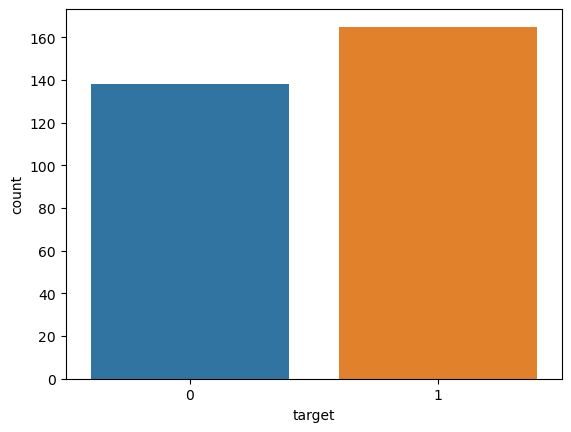

In [20]:
sns.countplot(x="target", data=df)

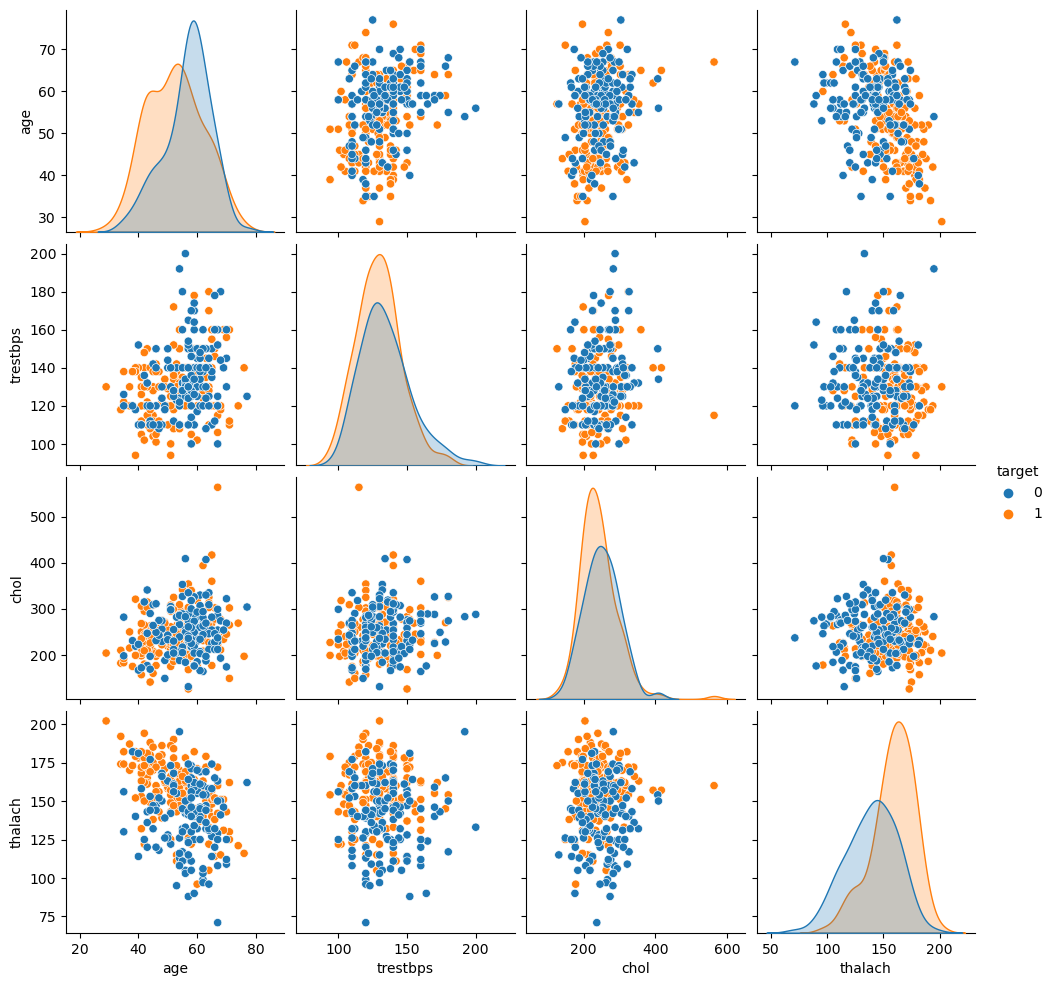

In [33]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<Axes: >

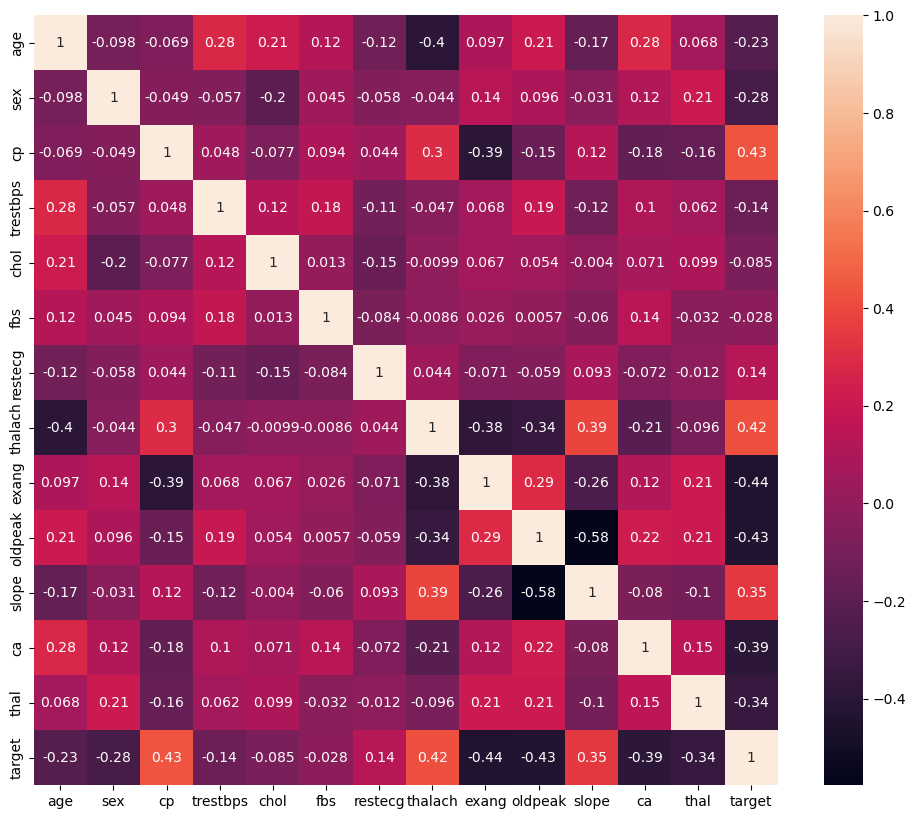

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='trestbps', ylabel='chol'>

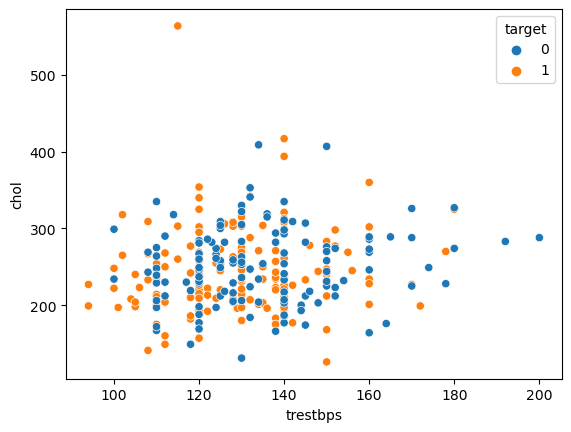

In [16]:
sns.scatterplot(x="trestbps", y="chol", data=df, hue="target")

<Axes: xlabel='fbs', ylabel='chol'>

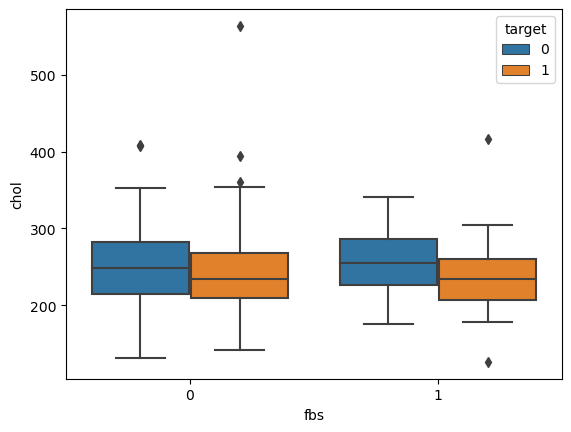

In [18]:
sns.boxplot(x="fbs", y="chol", data=df, hue="target")

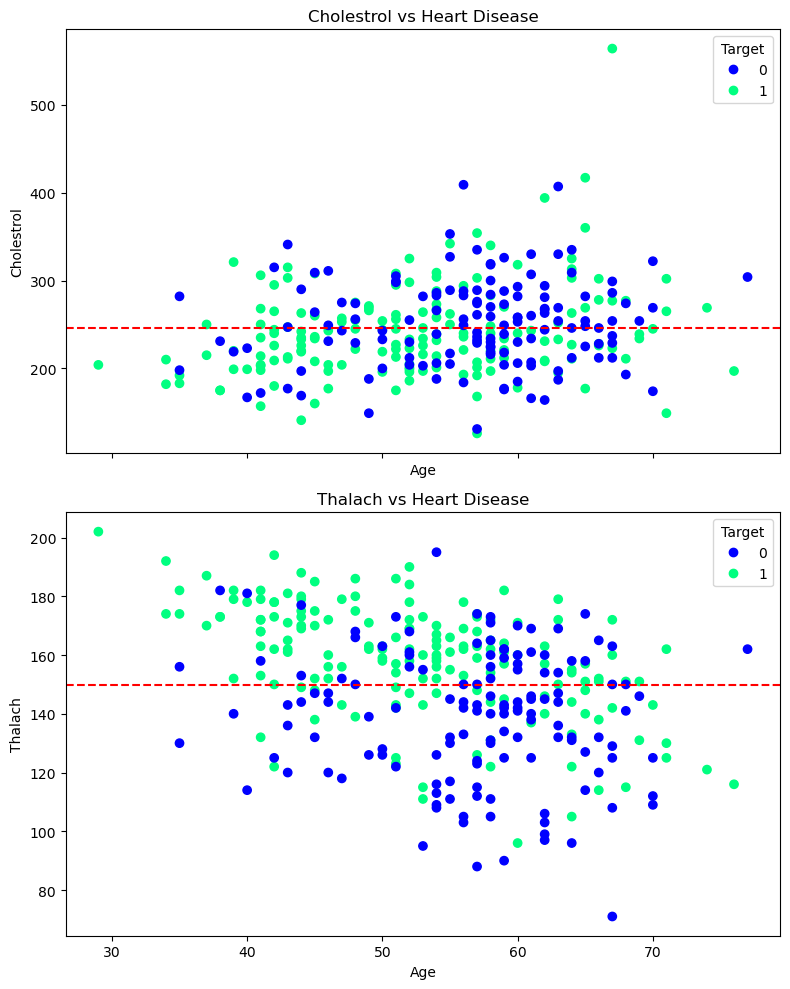

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,10), sharex=True)

scatter1 = ax1.scatter(x=df["age"], y=df["chol"], c=df["target"], cmap="winter")
ax1.set(title = "Cholestrol vs Heart Disease",
       xlabel = "Age",
       ylabel = "Cholestrol")
ax1.legend(*scatter1.legend_elements(), title = "Target")
ax1.axhline(df["chol"].mean(), ls = "--", color="red")

scatter2 = ax2.scatter(x = df["age"], y=df["thalach"], c=df["target"], cmap="winter")
ax2.set(title="Thalach vs Heart Disease", 
       xlabel="Age",
       ylabel="Thalach")
ax2.legend(*scatter2.legend_elements(), title="Target")
ax2.axhline(df["thalach"].mean(), ls="--", color="red")
plt.tight_layout()


In [38]:
X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression( max_iter=500)
grid = {"penalty": ["l1", "l2"], "solver": ["liblinear", "newton-cg"], "C": np.logspace(0,10,20)}

grid_model = GridSearchCV(model, param_grid=grid)
grid_model.fit(scaled_X_train, y_train)

C:\Users\Radhika\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Radhika\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Radhika\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Radhika\anaconda3\Lib\site-packages\sklearn\linea

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg']})

In [39]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
grid_model.best_estimator_.coef_[0]


array([-0.08636341, -0.64011692,  0.89802483, -0.31540753, -0.24208529,
        0.09218925,  0.18911481,  0.39420918, -0.47996202, -0.47577558,
        0.42290901, -0.82597055, -0.5586334 ])

<Axes: >

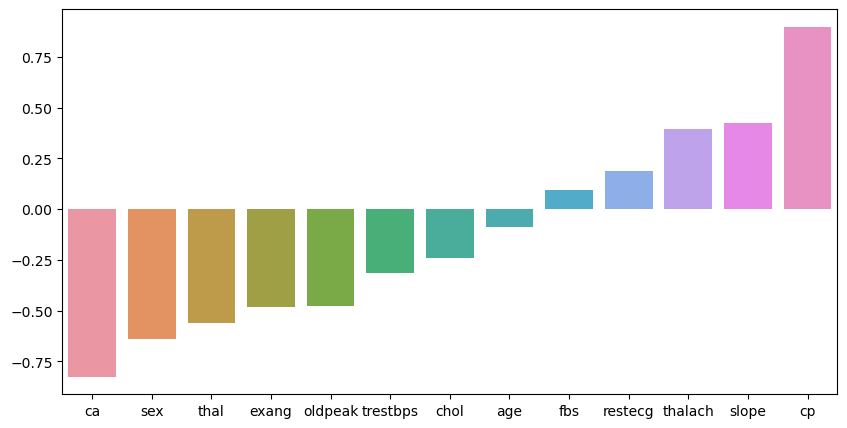

In [65]:
plt.figure(figsize=(10,5))
data = pd.Series(index=X.columns, data=grid_model.best_estimator_.coef_[0])
coefs = data.sort_values()
sns.barplot(x=coefs.index, y=coefs.values)

In [40]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

0.8360655737704918
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61





<Axes: >

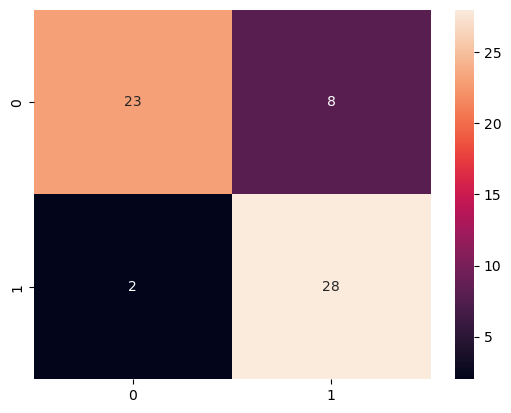

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\n")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
#Calculate fpr,tpr, and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_pred)
score = roc_auc_score(y_test, y_pred)

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(TPR)
    and true positive rate (TPR) of a model.
    """
    
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    #Plot the line with no predictive power
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label = "Guessing")
    
    #Customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    
    plt.legend()
    plt.show()
    
print(f"AUC Score: {score}")

AUC Score: 0.8376344086021505


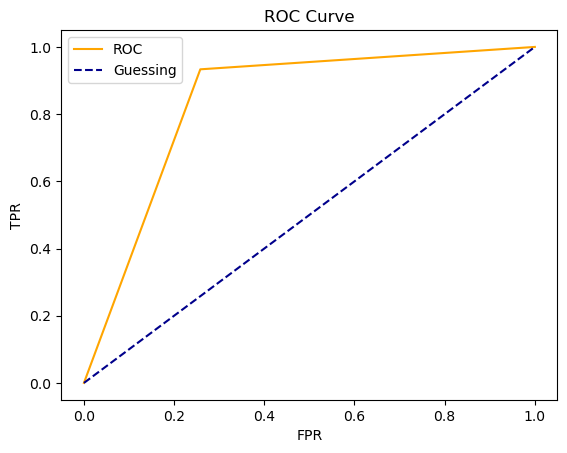

In [44]:
plot_roc(fpr, tpr)

## Unseen Data

In [66]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [67]:
grid_model.predict(patient)

array([0], dtype=int64)

In [69]:
grid_model.predict_proba(patient) 
#This implies that our model is 100% sure that the patient does not have a heart disease

array([[1.00000000e+00, 9.79048715e-32]])